## Multiple Linear Regression

Multiple linear regression is a machine learning method that defines the relationship between two or more independent variables and a dependent variable. It extends the concept of simple linear regression, where only one independent variable is used to predict the dependent variable.

In multiple linear regression, the relationship between the independent variables (often denoted as $X_1$, $X_2$, ..., $X_n$) and the dependent variable (often denoted as $Y$) is represented by the equation:

$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_n X_n $

Where:
- $Y$ is the dependent variable or the target (the variable we want to predict).
- $X_1$, $X_2$, ..., $X_n$ are the independent variables or the features (the variables used to predict $Y$).
- $\beta_0$ is the y-intercept (the value of $Y$ when all independent variables are zero).
- $\beta_1$, $\beta_2$, ..., $\beta_n$ are the parameters (also known as slopes or regression coefficients)

In [ ]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn import linear_model
import pandas as pd

url = 'https://drive.google.com/file/d/1hKu4Q642_6aEjGi_yrEBxT7edxkMKppV/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = pd.read_csv(path)
data

### Correlation Analysis

The correlation coefficient is a statistical measure that quantifies the strength and direction of the linear relationship between two variables. It is a value that ranges from -1 to 1, where:

- **1** indicates a perfect positive linear relationship: as one variable increases, the other variable also increases proportionally.
- **-1** indicates a perfect negative linear relationship: as one variable increases, the other variable decreases proportionally.
- **0** indicates no linear relationship between the variables: changes in one variable do not predict changes in the other.

There are different types of correlation coefficients, but the most commonly used is the Pearson correlation coefficient, which is calculated as follows:

$ r = \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum (X_i - \bar{X})^2 \sum (Y_i - \bar{Y})^2}} $

Where:
- $ X_i $ and $ Y_i $ are the individual sample points.
- $ \bar{X} $ and $ \bar{Y} $ are the means of the $ X $ and $ Y $ variables, respectively.

<h3> Interpretation of the Pearson Correlation Coefficient:</h3>

- **$ r > 0 $**: Indicates a positive relationship.
  - The closer $ r $ is to 1, the stronger the positive linear relationship.
- **$ r < 0 $**: Indicates a negative relationship.
  - The closer $ r $ is to -1, the stronger the negative linear relationship.
- **$ r = 0 $**: Indicates no linear relationship.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

# Define custom colors for the colormap
colors = ["red", "#e2e2e2", "green"]
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_rg", colors)

# Calculate the correlation matrix
corr = data.corr()

# Create a heatmap using the custom colormap and setting color range
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap=custom_cmap, fmt=".2f", linewidths=0.5, cbar=True, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Tips Dataset')
plt.show()


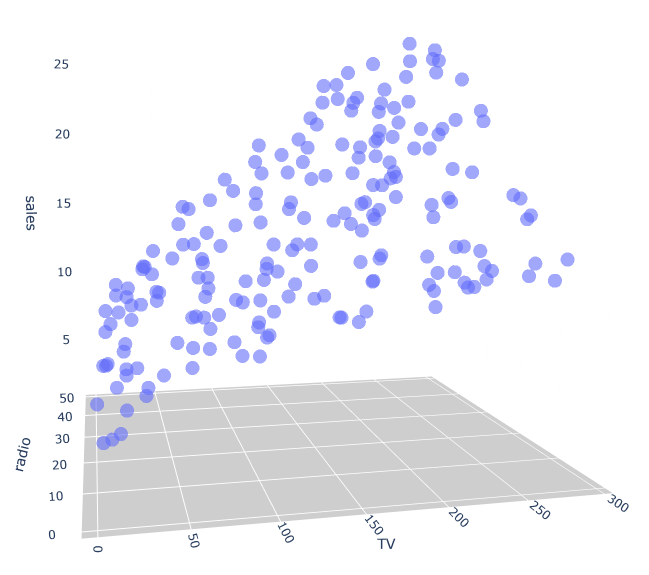

In [ ]:
fig = px.scatter_3d(data, x='TV', y='radio', z='sales', width=800, height=800, opacity=0.6)
fig.update_layout(scene = dict(xaxis = dict(dict(backgroundcolor="rgb(230, 200,230)",gridcolor="white",showbackground=False,zerolinecolor="white")),
                               yaxis = dict(backgroundcolor="rgb(230, 200,230)",gridcolor="white",showbackground=False,zerolinecolor="white"),
                               zaxis = dict(backgroundcolor="#cecece",gridcolor="white", showbackground=True, zerolinecolor="white")),)
fig.show()

### Train and Visualize the Model

In [ ]:
from sklearn.model_selection import train_test_split

X = data[["TV", "radio"]]
y = data["sales"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

# Print the parameters
print(model.intercept_,model.coef_)

In [ ]:
# Visualize the model
mesh_size = .4
x_min, x_max = X_train.TV.min(), X_train.TV.max()
y_min, y_max = X_train.radio.min(), X_train.radio.max()
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)
pred = model.predict(np.c_[xx.ravel(), yy.ravel()])
pred = pred.reshape(xx.shape)

fig = px.scatter_3d(data, x='TV', y='radio', z='sales', width=800, height=800)

fig.update_traces(marker=dict(size=5))

fig.add_traces(go.Surface(x=xrange, y=yrange, z=pred, name='pred_surface', showscale=False))

fig.update_layout(scene = dict(xaxis = dict(dict(backgroundcolor="rgb(230, 200,230)",gridcolor="white",showbackground=False,zerolinecolor="white")),
                               yaxis = dict(backgroundcolor="rgb(230, 200,230)",gridcolor="white",showbackground=False,zerolinecolor="white"),
                               zaxis = dict(backgroundcolor="#cecece",gridcolor="white", showbackground=True, zerolinecolor="white")),)

fig.show()

### Evaluate the Model

In [ ]:
from sklearn.metrics import r2_score
y_predicted = model.predict(X_test) # Use the model to predict the test data
r2_score(y_test, y_predicted) # for evaluation we only need the y_test and y_pred which are actual y observations and predicted y values respectively

## Interpreting the Parameters

In [ ]:
# Print the parameters
print(model.intercept_,model.coef_) # ["TV":0.05  and "radio":0.2]

In a multiple linear regression model, the coefficients (parameters) represent the relationship between each independent variable and the dependent variable, holding other variables constant. In our case, the coefficients for the independent variables "TV" and "radio" are approximately 0.05 and 0.2, respectively.

Here's how you can interpret these coefficients:

1. **TV Coefficient (0.05)**:
   - For every one unit increase in the TV advertising budget, the model predicts an increase of 0.05 units in sales, holding other variables constant or unchanged.
   - It suggests that TV advertising has a positive effect on sales, as indicated by the positive coefficient.
   - For example, if the TV advertising budget increases by 1000, the model predicts that sales will increase by 0.05 * 1000 = 50, assuming other variables remain constant.

2. **Radio Coefficient (0.2)**:
   - For every one unit increase in the radio advertising budget, the model predicts an increase of 0.2 units in sales, holding other variables constant or unchanged.
   - It suggests that radio advertising has a stronger positive effect on sales compared to TV advertising, as indicated by the higher coefficient.
   - For example, if the radio advertising budget increases by 1000, the model predicts that sales will increase by 0.2 * 1000 = 200, assuming other variables remain constant.

3. **Y-intercept (3):**
  - The y-intercept represents the estimated value of sales when both the "TV" and "radio" advertising expenditures are zero.
  - In this case, when there is no expenditure on TV or radio advertising, the estimated sales are 3 units.

## Multicollinearity

Multicollinearity is a statistical phenomenon where two or more predictor variables in a regression model are highly correlated. In other words, multicollinearity occurs when there is a linear relationship among independent variables, making it difficult for the model to differentiate the individual effects of each predictor variable on the dependent variable.

Multicollinearity can cause several issues in regression analysis, including:

1. Unreliable coefficient estimates: When predictor variables are highly correlated, it becomes difficult for the model to estimate the true effect of each variable on the dependent variable accurately.

2. Difficulty in interpreting coefficients: In the presence of multicollinearity, the coefficients of the correlated variables may be unstable or have unexpected signs, making it challenging to interpret the relationship between predictors and the dependent variable.

4. Reduced predictive accuracy: Multicollinearity can hinder the model's ability to make accurate predictions, as it may introduce noise and uncertainty into the estimation process.

To address multicollinearity, several techniques can be employed, including dropping one of the correlated variables, combining the correlated variables into a single variable, or using regularization techniques such as ridge regression or Lasso regression. Additionally, collecting more data or transforming variables can sometimes alleviate multicollinearity issues.